In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance

In [2]:
df = pd.read_csv('preci_alt.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format='%b %d, %Y')
df.head(3)

,date,value
0,2010-01-01,0.0
1,2010-01-02,0.0
2,2010-01-03,0.0


In [3]:
df2019 = df[(df.date.dt.year == 2019) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2018 = df[(df.date.dt.year == 2018) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2017 = df[(df.date.dt.year == 2017) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2016 = df[(df.date.dt.year == 2016) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2019

,date,value
3438,2019-06-01,0.000
3439,2019-06-02,0.000
3440,2019-06-03,0.000
3441,2019-06-04,0.000
3442,2019-06-05,0.001
...,...,...
3525,2019-08-27,0.002
3526,2019-08-28,0.002
3527,2019-08-29,0.002
3528,2019-08-30,0.014


<AxesSubplot:xlabel='value', ylabel='Density'>

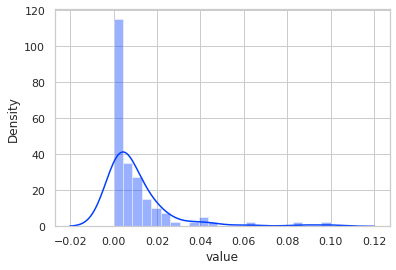

In [4]:
sns.distplot(df2019.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

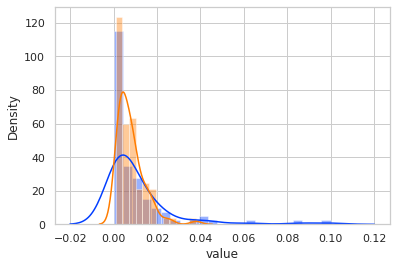

In [5]:
sns.distplot(df2019.value)
sns.distplot(df2018.value)

<AxesSubplot:xlabel='value', ylabel='Count'>

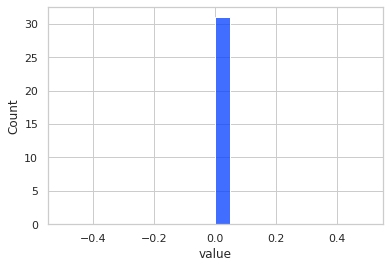

In [6]:
#sns.histplot(df2018.value)
#sns.histplot(df2017.value)
df19 = df[df.date.dt.year==2019]
dfjan = df19[df19.date.dt.month==1]
sns.histplot(dfjan.value,bins=20)

<AxesSubplot:xlabel='value', ylabel='Count'>

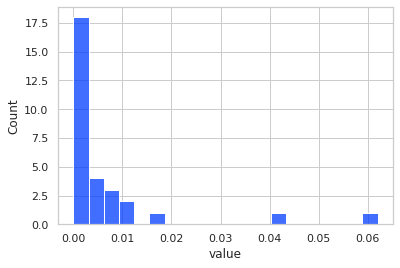

In [7]:
dfjan = df19[df19.date.dt.month==6]
sns.histplot(dfjan.value,bins=20)

<AxesSubplot:xlabel='value', ylabel='Count'>

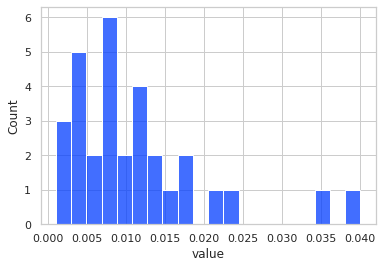

In [8]:
dfjan = df19[df19.date.dt.month==7]
sns.histplot(dfjan.value,bins=20)

<AxesSubplot:xlabel='value', ylabel='Count'>

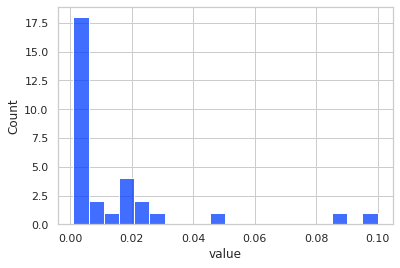

In [9]:
dfjan = df19[df19.date.dt.month==8]
sns.histplot(dfjan.value,bins=20)

<AxesSubplot:xlabel='value', ylabel='Count'>

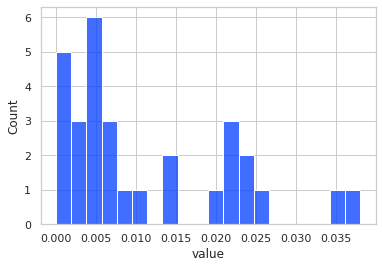

In [10]:
dfjan = df19[df19.date.dt.month==9]
sns.histplot(dfjan.value,bins=20)

<AxesSubplot:xlabel='value', ylabel='Count'>

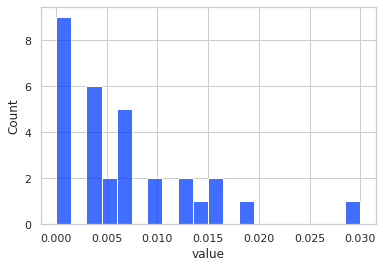

In [11]:
dfjan = df19[df19.date.dt.month==10]
sns.histplot(dfjan.value,bins=20)

In [12]:
n2018 = np.array(df2018.value)
n2019 = np.array(df2019.value)

n2018 = np.append(n2018,n2019.max())
n2018 = np.append(n2018,n2019.min())

n2019 = np.append(n2019,n2018.max())
n2019 = np.append(n2019,n2018.min())
count1, bin_edges1 = np.histogram(n2018, bins=20)
print(count1)
print(bin_edges1)

[36 31 13 10  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1]
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]


In [13]:
count1, bin_edges1 = np.histogram(n2019, bins=20)
print(count1)
print(bin_edges1)
n2019.max()

[47 17  9  7  5  1  0  1  2  1  0  0  1  0  0  0  0  1  0  2]
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]


0.1

In [14]:
df19 = df[df.date.dt.year==2019]

a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2019, bins=20)
        count2, bin_edges2 = np.histogram(n2018, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = jacc1

In [15]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
1,0.909091,1.000000,0.909091,0.771429,0.909091,0.476190,0.050000,0.465116,0.127273,0.211538,0.823529,0.694444
2,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
3,0.756757,0.823529,0.756757,1.000000,0.756757,0.488372,0.120690,0.444444,0.207547,0.226415,0.828571,0.750000
4,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
5,0.477273,0.512195,0.477273,0.488372,0.477273,1.000000,0.413043,0.585366,0.391304,0.547619,0.560976,0.536585
6,0.064516,0.067797,0.064516,0.120690,0.064516,0.382979,1.000000,0.375000,0.354167,0.375000,0.120690,0.103448
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.625000,0.404255,1.000000,0.547619,0.571429,0.511628,0.488372
8,0.140351,0.148148,0.140351,0.207547,0.140351,0.361702,0.354167,0.511628,1.000000,0.511628,0.207547,0.188679
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.511628,0.346939,0.534884,0.477273,1.000000,0.274510,0.280000


In [16]:
df19 = df[df.date.dt.year==2019]
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = x
dfww = pd.DataFrame(a)
dfww = dfww / 0.014387
cm = sns.light_palette("green", as_cmap=True)
s = dfww.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.025486,0.000000,0.488867,0.762337,1.000007,0.769213,0.455160,0.039387,0.033555
1,0.000000,0.000000,0.000000,0.025486,0.000000,0.488867,0.762337,1.000007,0.769213,0.455160,0.039387,0.033555
2,0.000000,0.000000,0.000000,0.025486,0.000000,0.488867,0.762337,1.000007,0.769213,0.455160,0.039387,0.033555
3,0.025486,0.025486,0.025486,0.000000,0.025486,0.463381,0.736851,0.974521,0.743727,0.429674,0.018535,0.012224
4,0.000000,0.000000,0.000000,0.025486,0.000000,0.488867,0.762337,1.000007,0.769213,0.455160,0.039387,0.033555
5,0.488867,0.488867,0.488867,0.463381,0.488867,0.000000,0.407551,0.511139,0.419360,0.228626,0.449480,0.455312
6,0.762337,0.762337,0.762337,0.736851,0.762337,0.407551,0.000000,0.538120,0.192976,0.307177,0.722950,0.728782
7,1.000007,1.000007,1.000007,0.974521,1.000007,0.511139,0.538120,0.000000,0.403291,0.603143,0.960619,0.966452
8,0.769213,0.769213,0.769213,0.743727,0.769213,0.419360,0.192976,0.403291,0.000000,0.314053,0.729826,0.735658
9,0.455160,0.455160,0.455160,0.429674,0.455160,0.228626,0.307177,0.603143,0.314053,0.000000,0.415773,0.421605


In [17]:
qw = dfw + dfww
cm = sns.light_palette("green", as_cmap=True)
s = qw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.736012,1.000000,0.933312,0.809956,1.434789,0.889903,0.655160,0.796144,0.674581
1,0.909091,1.000000,0.909091,0.796915,0.909091,0.965058,0.812337,1.465123,0.896486,0.666698,0.862917,0.728000
2,1.000000,0.909091,1.000000,0.736012,1.000000,0.933312,0.809956,1.434789,0.889903,0.655160,0.796144,0.674581
3,0.782243,0.849015,0.782243,1.000000,0.782243,0.951753,0.857541,1.418965,0.951274,0.656089,0.847107,0.762224
4,1.000000,0.909091,1.000000,0.736012,1.000000,0.933312,0.809956,1.434789,0.889903,0.655160,0.796144,0.674581
5,0.966140,1.001062,0.966140,0.951753,0.966140,1.000000,0.820595,1.096505,0.810664,0.776245,1.010455,0.991897
6,0.826853,0.830134,0.826853,0.857541,0.826853,0.790530,1.000000,0.913120,0.547143,0.682177,0.843639,0.832230
7,1.466673,1.500007,1.466673,1.451793,1.466673,1.136139,0.942376,1.000000,0.950910,1.174572,1.472247,1.454824
8,0.909564,0.917361,0.909564,0.951274,0.909564,0.781062,0.547143,0.914919,1.000000,0.825681,0.937373,0.924337
9,0.677382,0.690454,0.677382,0.656089,0.677382,0.740254,0.654116,1.138027,0.791326,1.000000,0.690282,0.701605


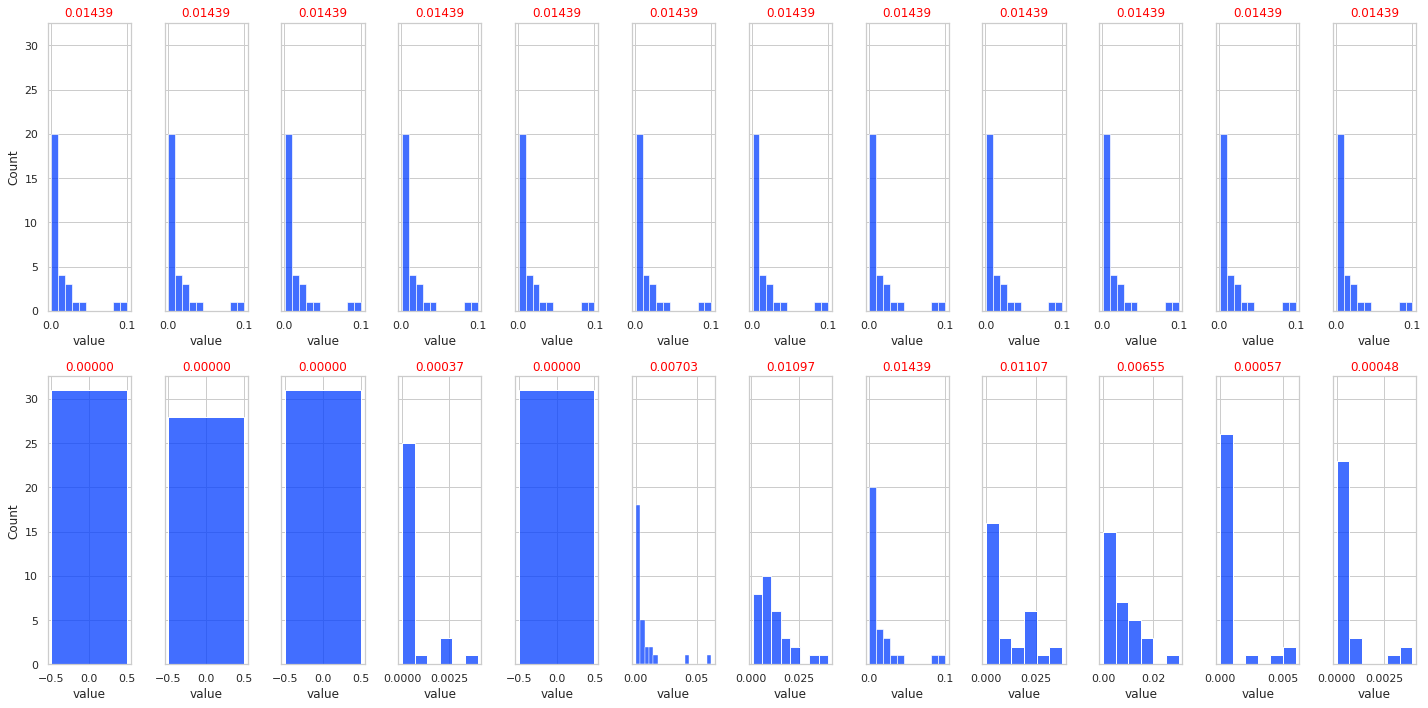

In [18]:
fig , [ax1,ax2] = plt.subplots(2,12,figsize=(20,10),sharey = True)
for i in range(0,12):
    dfaug = df19[df19.date.dt.month == 8]
    sns.histplot(dfaug.value,ax=ax1[i])
    ax1[i].set_title("{:.5f}".format(dfaug.value.mean()),c='red') 
for i in range(0,12):
    dfaug = df19[df19.date.dt.month == i+1]
    sns.histplot(dfaug.value,ax=ax2[i])
    ax2[i].set_title("{:.5f}".format(dfaug.value.mean()),c='red') 
plt.tight_layout()

In [19]:
df19 = df[df.date.dt.year==2019]
df20 = df[df.date.dt.year==2018]

a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df20[df20.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2018, bins=20)
        count2, bin_edges2 = np.histogram(n2019, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = jacc1

In [20]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
1,0.909091,1.000000,0.909091,0.823529,0.657895,0.050847,0.050000,0.050000,0.127273,0.657895,0.722222,0.909091
2,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
3,0.756757,0.823529,0.756757,0.939394,0.710526,0.142857,0.101695,0.120690,0.230769,0.710526,0.777778,0.756757
4,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
5,0.477273,0.512195,0.477273,0.488372,0.477273,0.641026,0.413043,0.382979,0.600000,0.547619,0.560976,0.477273
6,0.064516,0.067797,0.064516,0.101695,0.064516,0.547619,0.692308,0.500000,0.203704,0.118644,0.101695,0.064516
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.511628,0.500000,0.500000,0.511628,0.500000,0.477273,0.466667
8,0.140351,0.148148,0.140351,0.185185,0.140351,0.391304,0.444444,0.444444,0.280000,0.203704,0.185185,0.140351
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.413043,0.434783,0.434783,0.413043,0.294118,0.274510,0.222222
